In [1]:
# --- Setup and Imports ---
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np


🚀 Training on: cpu
Epoch [1/10] Loss: 0.8372 Train Acc: 69.95% Val Acc: 72.38%
Epoch [2/10] Loss: 0.4905 Train Acc: 82.21% Val Acc: 80.00%
Epoch [3/10] Loss: 0.3543 Train Acc: 85.82% Val Acc: 76.19%
Epoch [4/10] Loss: 0.3303 Train Acc: 87.74% Val Acc: 83.81%
Epoch [5/10] Loss: 0.2587 Train Acc: 92.79% Val Acc: 82.86%
Epoch [6/10] Loss: 0.1964 Train Acc: 93.03% Val Acc: 75.24%
Epoch [7/10] Loss: 0.1769 Train Acc: 92.55% Val Acc: 68.57%
Epoch [8/10] Loss: 0.2569 Train Acc: 90.14% Val Acc: 59.05%
Epoch [9/10] Loss: 0.1448 Train Acc: 94.71% Val Acc: 82.86%
Epoch [10/10] Loss: 0.1945 Train Acc: 93.27% Val Acc: 80.95%
💾 Model saved: models\bottle_classifier.pth


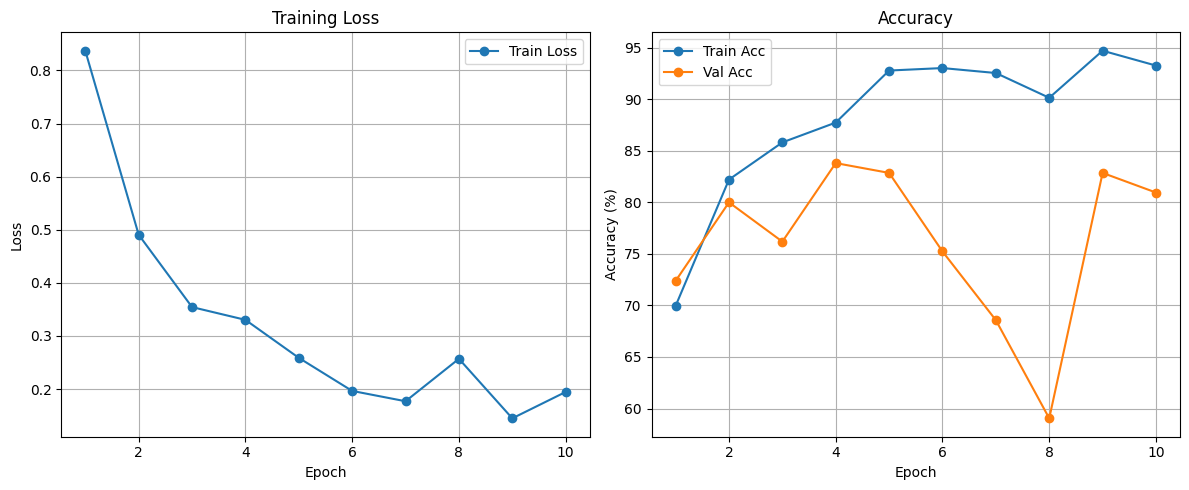

In [11]:
# --- Imports ---
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os

# --- Paths and Parameters ---
CURRENT_DIR = os.getcwd()
DATA_DIR = r"C:\Users\purva\Documents\Github\gass_Gassy\classifier-setup\data\sorted_data"
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

weights_path = r"C:\Users\purva\.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-3dd342df.pth"

batch_size = 8
num_epochs = 10
learning_rate = 0.001

# ------------------------
# Data transforms & loaders
# ------------------------
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

full_dataset = datasets.ImageFolder(DATA_DIR, transform=data_transforms)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ------------------------
# Model
# ------------------------
model = models.efficientnet_b0(weights=None)
state_dict = torch.load(weights_path, map_location="cpu")
model.load_state_dict(state_dict)

num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, len(full_dataset.classes))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Training on: {device}")
model = model.to(device)

# ------------------------
# Loss & optimizer
# ------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# ------------------------
# Helper function
# ------------------------
def evaluate(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return 100 * correct / total

# ------------------------
# Training loop with metrics
# ------------------------
train_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    val_acc = evaluate(model, val_loader, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {train_loss:.4f} "
          f"Train Acc: {train_acc:.2f}% Val Acc: {val_acc:.2f}%")

# ------------------------
# Save model
# ------------------------
model_path = os.path.join(MODEL_DIR, "bottle_classifier.pth")
torch.save(model.state_dict(), model_path)
print(f"💾 Model saved: {model_path}")

# ------------------------
# Plot metrics
# ------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o', label='Train Acc')
plt.plot(range(1, num_epochs+1), val_accuracies, marker='o', label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

 Using device: cpu

 Fold 1/5
----------------------------------------
Epoch [1/25] Train Loss: 0.9110 | Train Acc: 68.03% | Val Loss: 0.9843 | Val Acc: 66.67%
Epoch [2/25] Train Loss: 0.3491 | Train Acc: 91.83% | Val Loss: 0.5939 | Val Acc: 72.38%
Epoch [3/25] Train Loss: 0.1962 | Train Acc: 94.71% | Val Loss: 0.3849 | Val Acc: 79.05%
Epoch [4/25] Train Loss: 0.1008 | Train Acc: 97.84% | Val Loss: 0.6420 | Val Acc: 78.10%
Epoch [5/25] Train Loss: 0.0509 | Train Acc: 98.32% | Val Loss: 0.6793 | Val Acc: 76.19%
Epoch [6/25] Train Loss: 0.0446 | Train Acc: 99.28% | Val Loss: 0.7283 | Val Acc: 79.05%
Epoch [7/25] Train Loss: 0.0202 | Train Acc: 100.00% | Val Loss: 0.5864 | Val Acc: 81.90%
 Early stopping triggered.
 Saved best model for Fold 1: models\bottle_classifier_fold_1.pth


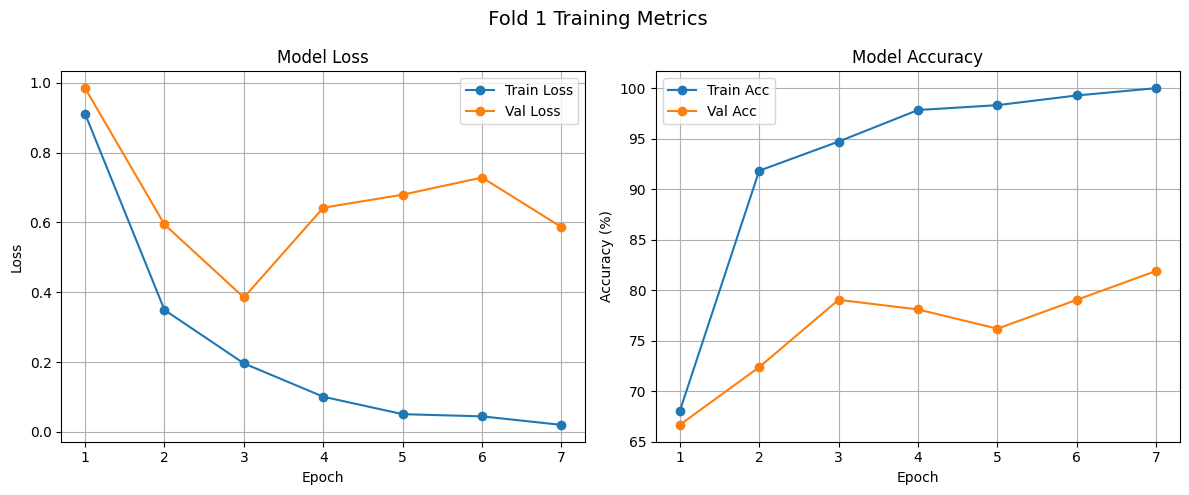


 Fold 2/5
----------------------------------------
Epoch [1/25] Train Loss: 0.8545 | Train Acc: 66.67% | Val Loss: 0.6672 | Val Acc: 69.23%
Epoch [2/25] Train Loss: 0.3428 | Train Acc: 89.21% | Val Loss: 0.5845 | Val Acc: 75.00%
Epoch [3/25] Train Loss: 0.1879 | Train Acc: 94.00% | Val Loss: 0.5772 | Val Acc: 80.77%
Epoch [4/25] Train Loss: 0.4096 | Train Acc: 97.36% | Val Loss: 0.6603 | Val Acc: 79.81%
Epoch [5/25] Train Loss: 0.0670 | Train Acc: 97.36% | Val Loss: 0.4938 | Val Acc: 83.65%
Epoch [6/25] Train Loss: 0.0883 | Train Acc: 97.36% | Val Loss: 0.6656 | Val Acc: 80.77%
Epoch [7/25] Train Loss: 0.4378 | Train Acc: 98.80% | Val Loss: 0.6154 | Val Acc: 83.65%
Epoch [8/25] Train Loss: 0.0556 | Train Acc: 98.80% | Val Loss: 0.5369 | Val Acc: 80.77%
Epoch [9/25] Train Loss: 0.2320 | Train Acc: 98.56% | Val Loss: 0.6562 | Val Acc: 82.69%
 Early stopping triggered.
 Saved best model for Fold 2: models\bottle_classifier_fold_2.pth


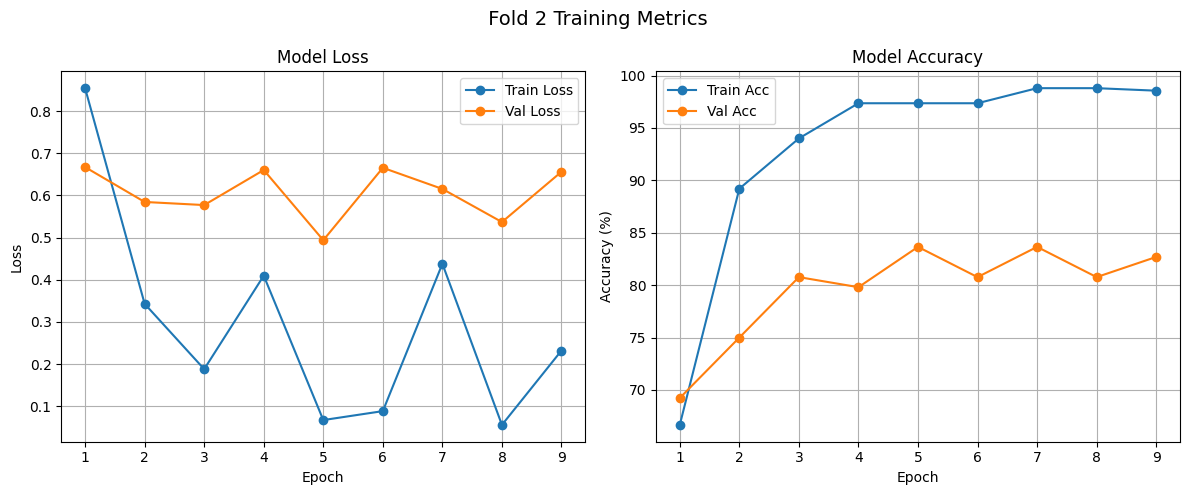


 Fold 3/5
----------------------------------------
Epoch [1/25] Train Loss: 0.8679 | Train Acc: 66.43% | Val Loss: 0.4331 | Val Acc: 84.62%
Epoch [2/25] Train Loss: 0.3709 | Train Acc: 89.69% | Val Loss: 0.2677 | Val Acc: 89.42%
Epoch [3/25] Train Loss: 0.4897 | Train Acc: 93.05% | Val Loss: 0.3107 | Val Acc: 86.54%
Epoch [4/25] Train Loss: 0.1437 | Train Acc: 96.40% | Val Loss: 0.2848 | Val Acc: 86.54%
Epoch [5/25] Train Loss: 0.0749 | Train Acc: 99.28% | Val Loss: 0.3305 | Val Acc: 87.50%
Epoch [6/25] Train Loss: 0.0487 | Train Acc: 98.56% | Val Loss: 0.2859 | Val Acc: 92.31%
 Early stopping triggered.
 Saved best model for Fold 3: models\bottle_classifier_fold_3.pth


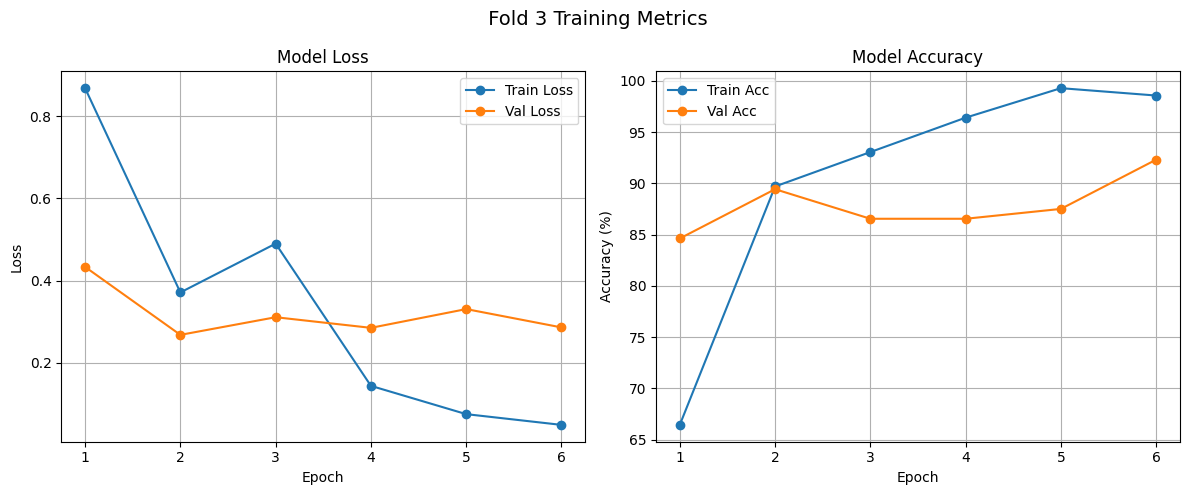


 Fold 4/5
----------------------------------------
Epoch [1/25] Train Loss: 1.1046 | Train Acc: 64.03% | Val Loss: 0.8106 | Val Acc: 72.12%
Epoch [2/25] Train Loss: 0.4067 | Train Acc: 88.97% | Val Loss: 0.4571 | Val Acc: 84.62%
Epoch [3/25] Train Loss: 0.2147 | Train Acc: 94.00% | Val Loss: 0.3779 | Val Acc: 85.58%
Epoch [4/25] Train Loss: 0.1310 | Train Acc: 97.36% | Val Loss: 0.4525 | Val Acc: 85.58%
Epoch [5/25] Train Loss: 0.0679 | Train Acc: 98.56% | Val Loss: 0.4045 | Val Acc: 87.50%
Epoch [6/25] Train Loss: 0.3484 | Train Acc: 97.84% | Val Loss: 0.5471 | Val Acc: 81.73%
Epoch [7/25] Train Loss: 0.0683 | Train Acc: 98.80% | Val Loss: 0.3936 | Val Acc: 87.50%
 Early stopping triggered.
 Saved best model for Fold 4: models\bottle_classifier_fold_4.pth


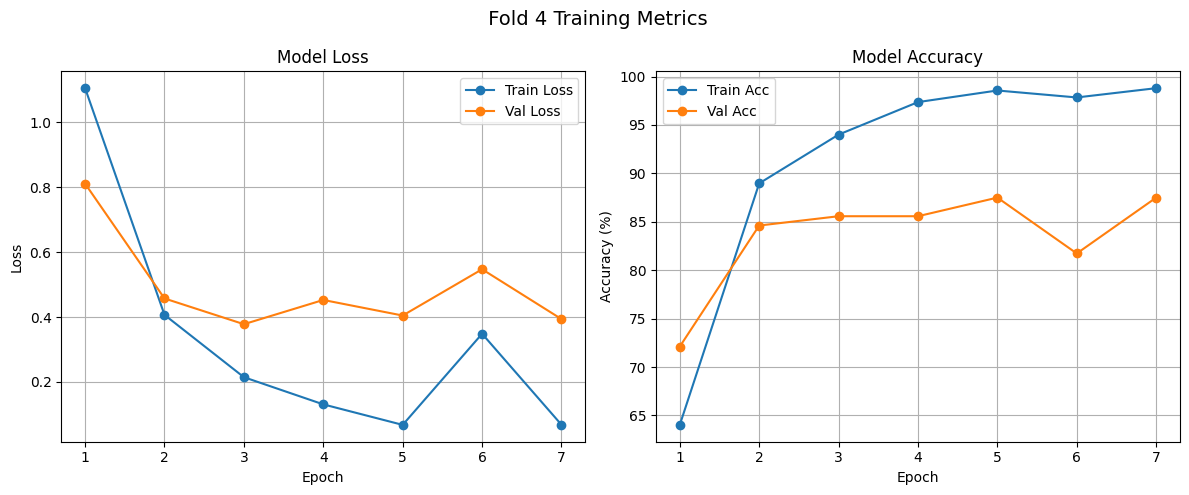


 Fold 5/5
----------------------------------------
Epoch [1/25] Train Loss: 0.9871 | Train Acc: 71.46% | Val Loss: 0.5710 | Val Acc: 78.85%
Epoch [2/25] Train Loss: 0.3546 | Train Acc: 89.69% | Val Loss: 0.3472 | Val Acc: 84.62%
Epoch [3/25] Train Loss: 0.5167 | Train Acc: 94.72% | Val Loss: 0.3705 | Val Acc: 85.58%
Epoch [4/25] Train Loss: 0.1506 | Train Acc: 97.84% | Val Loss: 0.4012 | Val Acc: 84.62%
Epoch [5/25] Train Loss: 0.3235 | Train Acc: 96.88% | Val Loss: 0.3947 | Val Acc: 86.54%
Epoch [6/25] Train Loss: 0.0601 | Train Acc: 99.52% | Val Loss: 0.3431 | Val Acc: 91.35%
Epoch [7/25] Train Loss: 0.0436 | Train Acc: 99.52% | Val Loss: 0.3196 | Val Acc: 88.46%
Epoch [8/25] Train Loss: 0.0293 | Train Acc: 99.28% | Val Loss: 0.3402 | Val Acc: 87.50%
Epoch [9/25] Train Loss: 0.0315 | Train Acc: 99.52% | Val Loss: 0.5073 | Val Acc: 86.54%
Epoch [10/25] Train Loss: 0.0127 | Train Acc: 99.76% | Val Loss: 0.4283 | Val Acc: 87.50%
Epoch [11/25] Train Loss: 0.4058 | Train Acc: 99.28% | Va

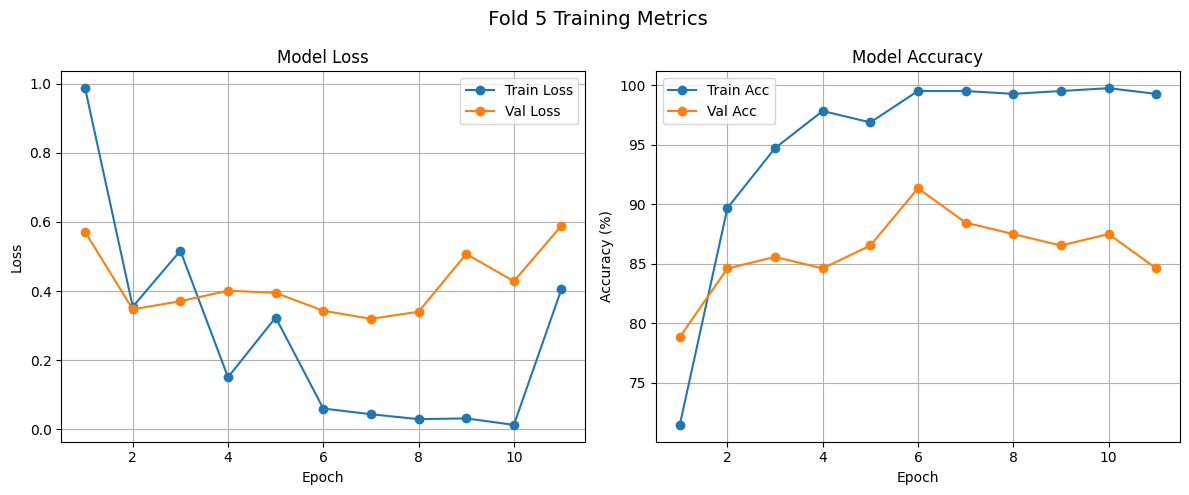


 Cross-validation results:
Fold 1 - Best Val Loss: 0.3849, Best Val Acc: 81.90%
Fold 2 - Best Val Loss: 0.4938, Best Val Acc: 83.65%
Fold 3 - Best Val Loss: 0.2677, Best Val Acc: 92.31%
Fold 4 - Best Val Loss: 0.3779, Best Val Acc: 87.50%
Fold 5 - Best Val Loss: 0.3196, Best Val Acc: 91.35%

 Average Validation Accuracy across 5 folds: 87.34%


In [1]:
# --- Imports ---
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
import os

# --- Paths and Parameters ---
CURRENT_DIR = os.getcwd()
DATA_DIR = r"C:\Users\purva\Documents\Github\gass_Gassy\classifier-setup\data\sorted_data"
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

weights_path = r"C:\Users\purva\.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-3dd342df.pth"

batch_size = 32  # Increased batch size
num_epochs = 25
learning_rate = 0.0005  # Slightly lower LR for stability
patience = 4  # Early stopping patience
k_folds = 5
img_size = (224, 224)

# ------------------------
# Data transforms
# ------------------------
train_transforms = transforms.Compose([
    transforms.Resize(img_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),  # Better augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(img_size),
    transforms.CenterCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------
# Dataset setup
# ------------------------
full_dataset = datasets.ImageFolder(DATA_DIR, transform=train_transforms)
class_names = full_dataset.classes

# ------------------------
# Helper functions
# ------------------------
def create_model(num_classes, weights_path):
    model = models.efficientnet_b0(weights=None)
    state_dict = torch.load(weights_path, map_location="cpu")
    model.load_state_dict(state_dict)
    
    # Freeze early layers for stability, fine-tune later ones
    for param in model.features[:5].parameters():
        param.requires_grad = False

    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    return model

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    avg_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy

# ------------------------
# K-Fold Cross Validation
# ------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Using device: {device}")

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, val_idx) in enumerate(kf.split(np.arange(len(full_dataset)))):
    print(f"\n Fold {fold + 1}/{k_folds}")
    print("-" * 40)

    # Subset datasets
    train_subset = Subset(full_dataset, train_idx)
    val_subset = Subset(full_dataset, val_idx)

    # Apply transforms
    train_subset.dataset.transform = train_transforms
    val_subset.dataset.transform = val_transforms

    # Dataloaders
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=4)

    # Model, Loss, Optimizer
    model = create_model(len(class_names), weights_path).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)

    # Early stopping setup
    best_val_loss = float('inf')
    patience_counter = 0

    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

        # --- Early Stopping ---
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(" Early stopping triggered.")
                break

    # Load best model for final evaluation
    model.load_state_dict(best_model_state)
    fold_model_path = os.path.join(MODEL_DIR, f"bottle_classifier_fold_{fold+1}.pth")
    torch.save(model.state_dict(), fold_model_path)
    print(f" Saved best model for Fold {fold+1}: {fold_model_path}")

    # Record fold results
    fold_results.append({
        "fold": fold + 1,
        "best_val_loss": best_val_loss,
        "best_val_acc": max(val_accs)
    })

    # ------------------------
    # Plot metrics for this fold
    # ------------------------
    plt.figure(figsize=(12,5))
    plt.suptitle(f" Fold {fold + 1} Training Metrics", fontsize=14)

    plt.subplot(1,2,1)
    plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', label='Train Loss')
    plt.plot(range(1, len(val_losses)+1), val_losses, marker='o', label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.grid(True)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1, len(train_accs)+1), train_accs, marker='o', label='Train Acc')
    plt.plot(range(1, len(val_accs)+1), val_accs, marker='o', label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Model Accuracy')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------------
# Summary of all folds
# ------------------------
print("\n Cross-validation results:")
for result in fold_results:
    print(f"Fold {result['fold']} - Best Val Loss: {result['best_val_loss']:.4f}, "
          f"Best Val Acc: {result['best_val_acc']:.2f}%")

avg_acc = np.mean([r['best_val_acc'] for r in fold_results])
print(f"\n Average Validation Accuracy across {k_folds} folds: {avg_acc:.2f}%")
